# Machine Learning: A Quantitative Approach

+ Simple Liner regression approach to predicting fuel efficiency.

In [23]:
%matplotlib inline

In [24]:
import sys, csv
import time

import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from time import time
import matplotlib.style as style
from collections import Counter
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [25]:
style.use('seaborn-poster') # sets the size of the charts
style.use('ggplot') # set the theme for matplotlib

In [26]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Load Dataset

In [27]:
vehicles_df = pd.read_csv("datasets/vehicles.csv", low_memory = False)

## Linear Model

In [28]:
vehicles_displ_mpg_all = vehicles_df[['displ', 'UHighway']]
vehicles_displ_mpg = vehicles_displ_mpg_all[vehicles_displ_mpg_all.displ > 0]

In [29]:
half = int(len(vehicles_displ_mpg) / 2)

In [30]:
first_half = vehicles_displ_mpg[:half]
second_half = vehicles_displ_mpg[half:]

In [31]:
first_half_sorted = first_half.sort_values(by=['displ', 'UHighway'])
first_half_grouped_by_mean = pd.DataFrame({'train_mean' : \
                                          first_half_sorted.groupby('displ')['UHighway'].mean()}).reset_index()

In [32]:
first_half_x = first_half_grouped_by_mean['displ'].values.reshape(-1, 1)

In [33]:
print(type(first_half_x))
print(first_half_x.shape)

<class 'numpy.ndarray'>
(60, 1)


In [34]:
first_half_y = first_half_grouped_by_mean ['train_mean'].values.reshape(-1,1)
print(first_half_y.shape)

(60, 1)


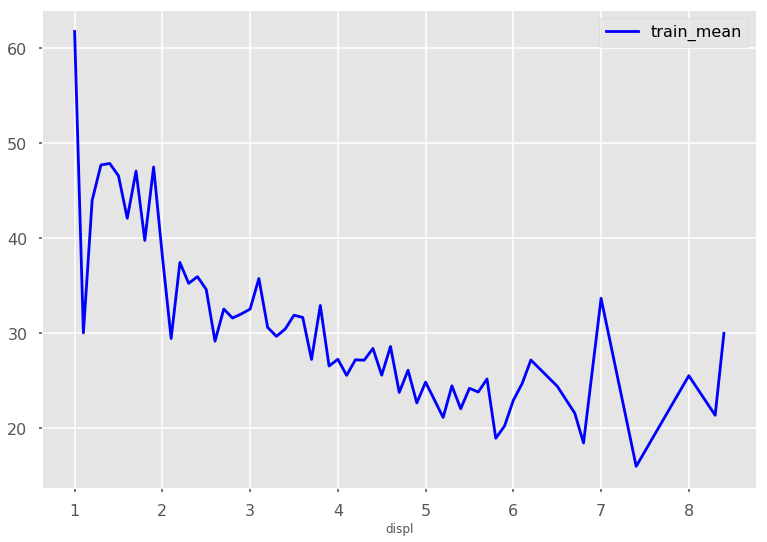

In [35]:
ax = first_half_grouped_by_mean.plot (x = "displ", y = "train_mean", c = "b")
plt.show ()

In [36]:
second_half_sorted = second_half.sort_values(by=['displ', 'UHighway'])
second_half_grouped_by_mean = pd.DataFrame({'test_mean' : \
                                           second_half_sorted.groupby('displ')['UHighway'].mean()}).reset_index()

In [37]:
second_half_x = second_half_grouped_by_mean['displ'].values.reshape(-1, 1)
second_half_y = second_half_grouped_by_mean['test_mean'].values.reshape(-1, 1)

In [38]:
regr = linear_model.LinearRegression()

In [39]:
regr.fit(first_half_x, first_half_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
second_half_y_pred = regr.predict(second_half_x)

In [41]:
print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

Intercept:  [44.58739248]
Coefficients:  [[-3.43936081]]


In [42]:
# mean squared error
mse = mean_squared_error(second_half_y, second_half_y_pred)
rmse = np.sqrt(mse)
print("Mean squared error: %.2f" % mse)
print("Root mean squared error: %.2f" % rmse)
# Explained variance score: 1 is perfect prediction
print('R-squared score: %.2f' % r2_score(second_half_y, second_half_y_pred))

Mean squared error: 29.61
Root mean squared error: 5.44
R-squared score: 0.67


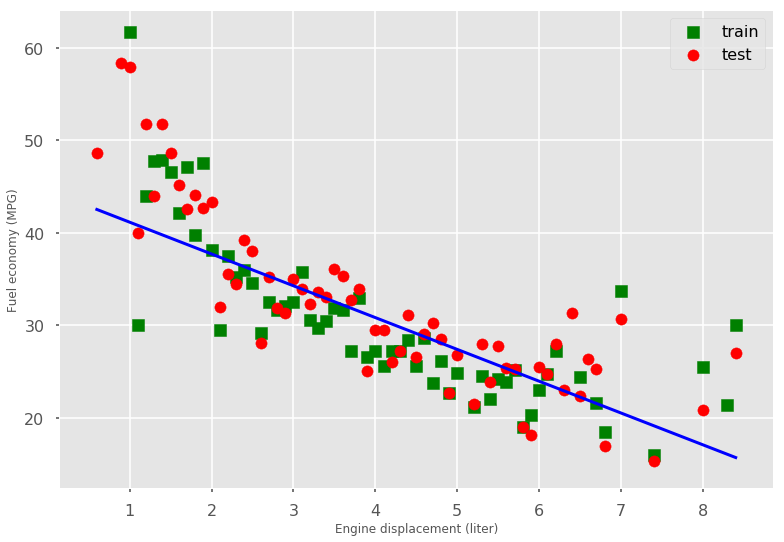

In [43]:
# Plot outputs
plt_train = plt.scatter(first_half_x, first_half_y,  marker='s', color='green')
plt_test = plt.scatter(second_half_x, second_half_y,  marker='o', color='red')
plt.plot(second_half_x, second_half_y_pred, color='blue', linewidth=3)
plt.legend ((plt_train, plt_test), ('train', 'test'))
plt.xlabel ("Engine displacement (liter)")
plt.ylabel ("Fuel economy (MPG)")

plt.show()

degree 1: 
	Intercept:  [44.58739248]
	Coefficients:  [[-3.43936081]]
	Mean squared error: 29.61
	Root mean squared error: 5.44
	R-squared score: 0.67

	Compare with mse and rmse for the training set:
	Mean squared error: 30.91
	Root mean squared error: 5.56
	R-squared score: 0.59
degree 2: 
	Intercept:  [58.15142453]
	Coefficients:  [[-11.15467385   0.87709853]]
	Mean squared error: 18.62
	Root mean squared error: 4.32
	R-squared score: 0.79

	Compare with mse and rmse for the training set:
	Mean squared error: 18.36
	Root mean squared error: 4.28
	R-squared score: 0.76
degree 4: 
	Intercept:  [66.40492405]
	Coefficients:  [[-20.77109779   4.39432126  -0.50472328   0.02476869]]
	Mean squared error: 17.90
	Root mean squared error: 4.23
	R-squared score: 0.80

	Compare with mse and rmse for the training set:
	Mean squared error: 18.09
	Root mean squared error: 4.25
	R-squared score: 0.76
degree 8: 
	Intercept:  [72.80558957]
	Coefficients:  [[-6.13303408e+01  7.64515308e+01 -5.86430024e

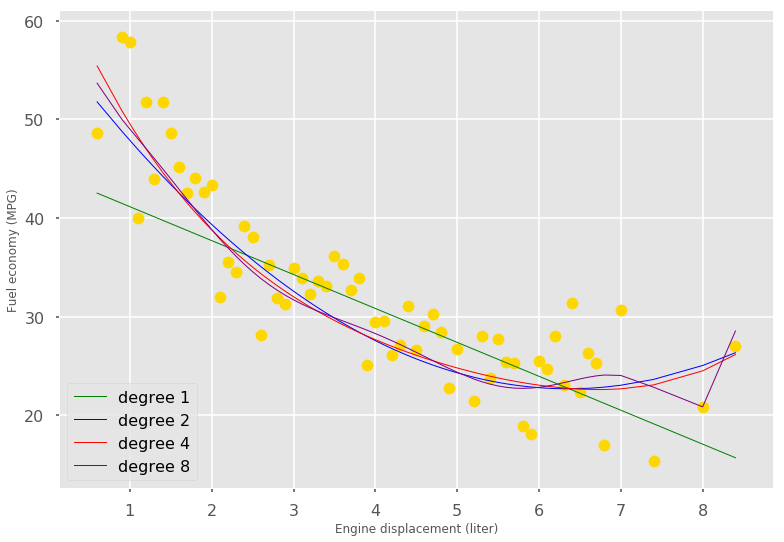

In [44]:
colors = ['green', 'blue', 'red', 'purple']
lw = 1

for count, degr in enumerate([1, 2, 4, 8]):
    # Create linear regression object
    poly_features = PolynomialFeatures(degree = degr, include_bias = False)
    first_half_x_poly = poly_features.fit_transform(first_half_x)

    model = linear_model.LinearRegression()
    model.fit(first_half_x_poly, first_half_y)

    # Make predictions using the testing set
    second_half_x_poly = poly_features.fit_transform(second_half_x)
    second_half_y_pred = model.predict(second_half_x_poly)
    plt.plot(second_half_x, second_half_y_pred, color=colors[count], linewidth=lw,
         label="degree %d" % degr)

    print("degree %d: " % degr)
    print('\tIntercept: ', model.intercept_)
    print('\tCoefficients: ', model.coef_)
    mse = mean_squared_error(second_half_y, second_half_y_pred)
    rmse = np.sqrt(mse)
    print("\tMean squared error: %.2f" % mse)
    print("\tRoot mean squared error: %.2f" % rmse)
    # Explained variance score: 1 is perfect prediction
    print('\tR-squared score: %.2f' % r2_score(second_half_y, second_half_y_pred))

    print ("\n\tCompare with mse and rmse for the training set:")
    first_half_y_pred = model.predict(first_half_x_poly)
    mse = mean_squared_error(first_half_y, first_half_y_pred)
    rmse = np.sqrt(mse)
    print("\tMean squared error: %.2f" % mse)
    print("\tRoot mean squared error: %.2f" % rmse)
    print('\tR-squared score: %.2f' % r2_score(first_half_y, first_half_y_pred))
    
# Plot outputs
plt.scatter(second_half_x, second_half_y,  color='gold')

plt.xlabel ("Engine displacement (liter)")
plt.ylabel ("Fuel economy (MPG)")
plt.legend(loc='lower left')
plt.show()